# Load CSV data

In [2]:
import pandas as pd
import numpy as np

# Make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

2024-11-14 17:44:26.127841: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## In memory data

In [3]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"]
)

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [4]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [5]:
abalone_features = np.array(abalone_features)
abalone_features.shape

(3320, 7)

In [6]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

In [7]:
abalone_model.fit(
    abalone_features,
    abalone_labels,
    epochs=10,
)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - loss: 88.9919
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 23.1639
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 8.7285
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 8.5036
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 7.3291
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 7.0136
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 6.7292
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 7.4764
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 6.8376
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 6.6884


## Basic preprocessing

In [8]:
normalize = layers.Normalization()

In [9]:
normalize.adapt(abalone_features)

In [10]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - loss: 95.5582
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 47.5329
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 30.3222
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 21.3186
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 13.6726
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 8.0917
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 6.7748
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0415
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 5.9617
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 5.8419


## Mixed data types

In [11]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [12]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [13]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor shape=(None,), dtype=float32, sparse=False, name=keras_tensor_9>

In [14]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [15]:
print(calc(np.array([1])).numpy())
print(calc(np.array([2])).numpy())

[3.]
[5.]


In [16]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=sex>,
 'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'n_siblings_spouses': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=n_siblings_spouses>,
 'parch': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=parch>,
 'fare': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=fare>,
 'class': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=class>,
 'deck': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=deck>,
 'embark_town': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=embark_town>,
 'alone': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=alone>}

In [17]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_11>

In [18]:
preprocessed_inputs = [all_numeric_inputs]

In [19]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

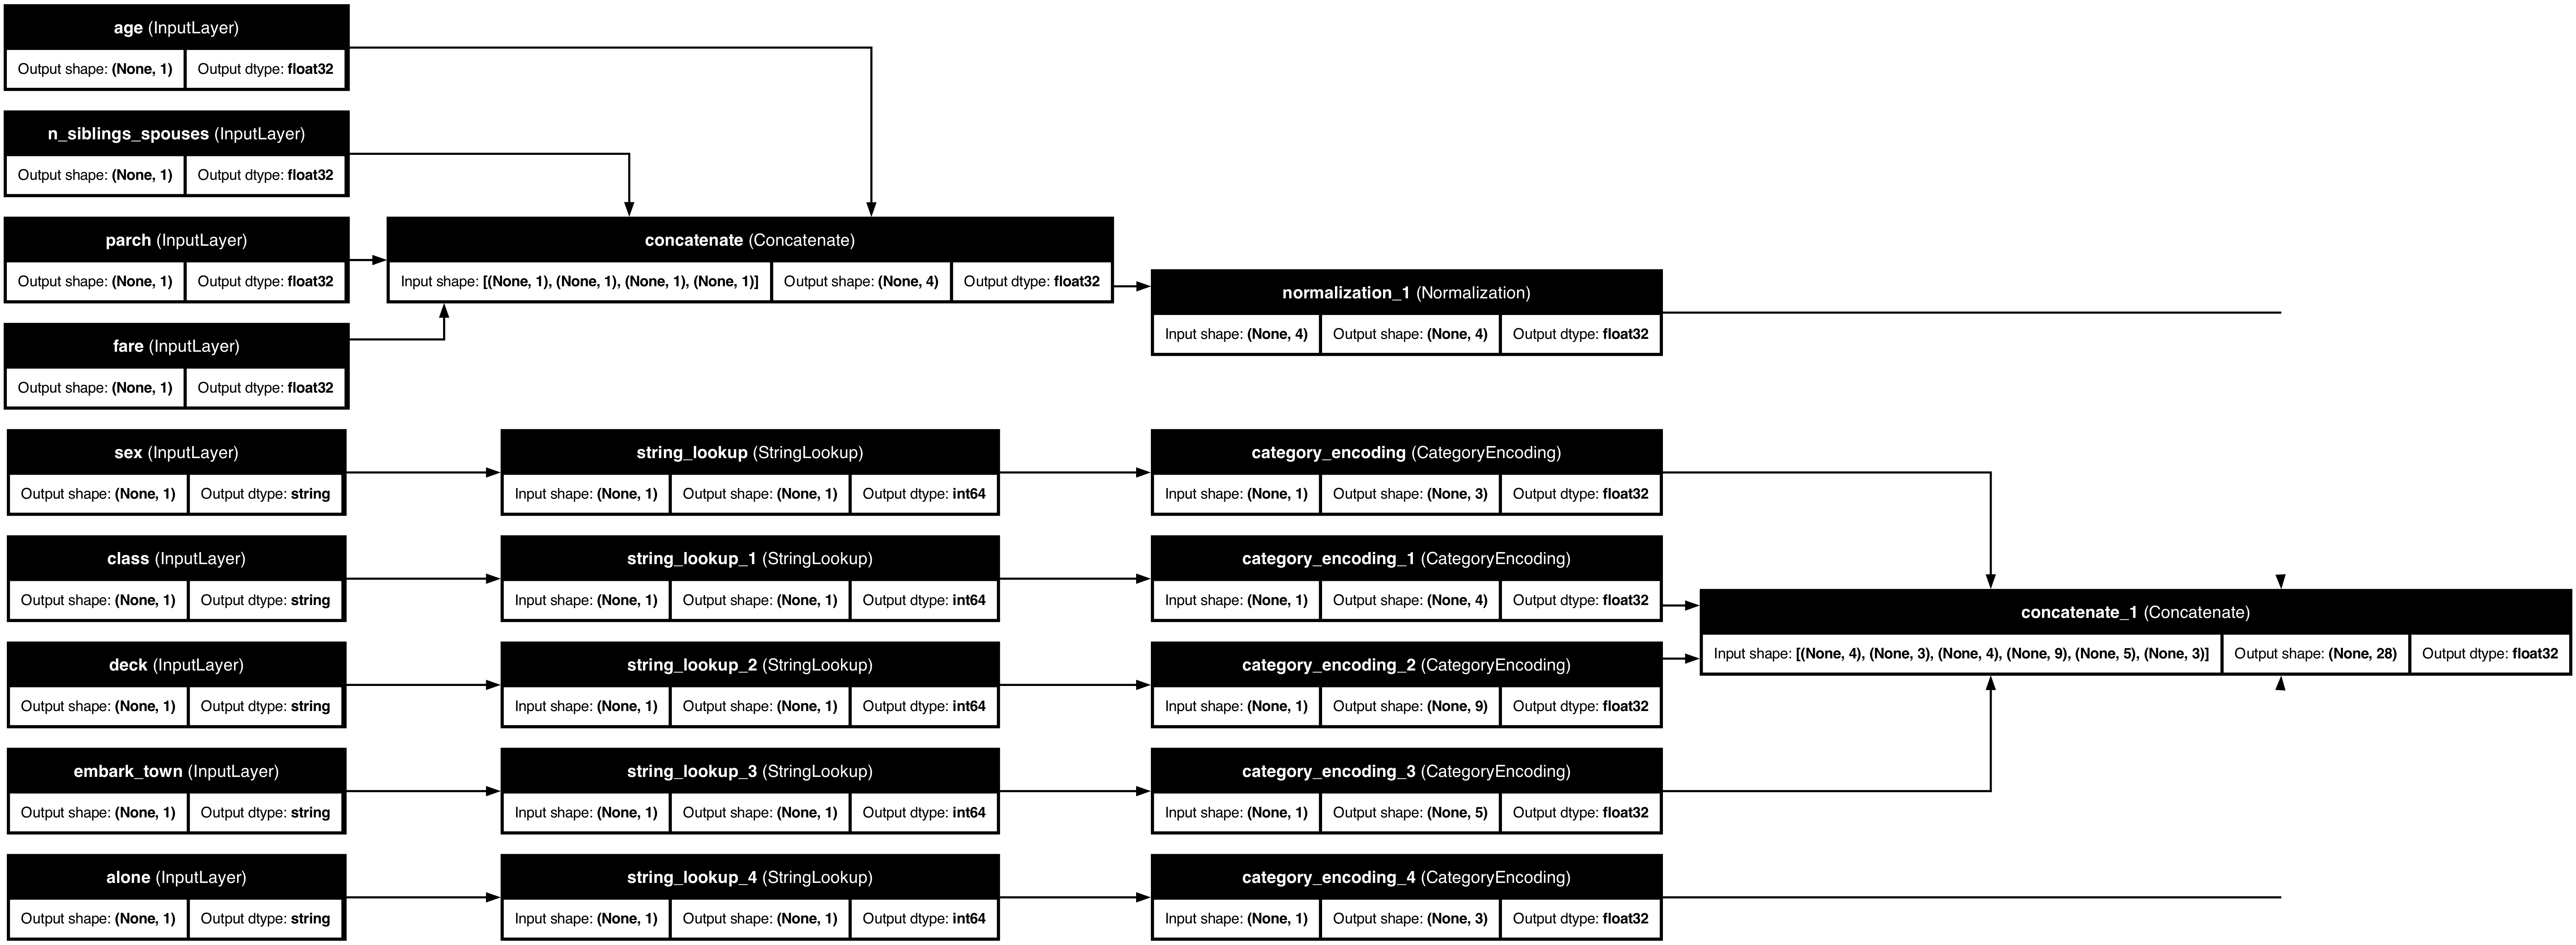

In [20]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(
    model = titanic_preprocessing , 
    rankdir="LR", 
    show_shapes=True,
    show_dtype = True,
    show_layer_names = True,
    show_layer_activations = True,
)

In [21]:
titanic_features_dict = {
    name: np.array(value) for name, value in titanic_features.items()
}

In [22]:
titanic_features_dict

{'sex': array(['male', 'female', 'female', 'female', 'male', 'male', 'female',
        'female', 'female', 'male', 'male', 'female', 'male', 'male',
        'female', 'female', 'male', 'male', 'female', 'male', 'male',
        'female', 'male', 'male', 'female', 'female', 'male', 'male',
        'male', 'male', 'female', 'female', 'female', 'male', 'female',
        'male', 'male', 'male', 'female', 'male', 'female', 'female',
        'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male',
        'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
        'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female',
        'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
        'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male',
        'male', 'male', 'male', 'female', 'male', 'female', 'male',
        'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
        'male', 'male', 'male', 'male', 'female',

In [23]:
features_dict = {
    name: values[:1] for name, values in titanic_features_dict.items()
}

titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [24]:
def titanic_model(preprocessing_head, inputs):
    body = tf.keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)

    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam()
    )

    return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [25]:
titanic_model.fit(
    x = titanic_features_dict,
    y = titanic_labels,
    epochs=10
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7077
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6190
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5451
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5322
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4935
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.4544
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.4477
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.4271
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4255
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.4188


In [26]:
titanic_model.save('../models/titanic_test.keras')

In [27]:
reloaded = tf.keras.models.load_model('../models/titanic_test.keras')

In [28]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)

assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.762]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.762]], shape=(1, 1), dtype=float32)


## Using tf.data

### On in memory data

In [29]:
import itertools

def slices(features):
    for i in itertools.count():
        # For each feature take index `i`
        example = {name: values[i] for name, values in features.items()}
        yield example

In [30]:
for example in slices(titanic_features_dict):
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


In [31]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

In [32]:
for example in features_ds:
    for name, value in example.items():
        print(f"{name:19s}: {value}")
    break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


In [33]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

In [34]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

In [35]:
titanic_batches

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'n_siblings_spouses': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'deck': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'embark_town': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [36]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4099
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.4229
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.4197
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.3773
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4139


### From a single file

In [37]:
titanic_file_path = tf.keras.utils.get_file(
    "train.csv", 
    "https://storage.googleapis.com/tf-datasets/titanic/train.csv",
    cache_dir='../datasets/',
    cache_subdir='titanic',
)

In [38]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,
)

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


In [39]:
for batch, label in titanic_csv_ds.take(1):
    for key, value in batch.items():
        print(f"{key:20s}: {value}")
    print()
    print(f"{'label' :20s}: {label}")

sex                 : [b'male' b'female' b'female' b'female' b'male']
age                 : [28. 35. 28. 31. 28.]
n_siblings_spouses  : [1 0 1 0 0]
parch               : [0 0 0 0 0]
fare                : [ 15.5   512.329  24.      8.683   7.896]
class               : [b'Third' b'First' b'Second' b'Third' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Queenstown' b'Cherbourg' b'Cherbourg' b'Southampton' b'Southampton']
alone               : [b'n' b'y' b'n' b'y' b'y']

label               : [0 1 1 1 0]


2024-11-14 17:44:41.722368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [40]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='../datasets/', 
    cache_subdir='traffic',
)

In [41]:
traffic_volume_csv_gz

'../datasets/traffic/Metro_Interstate_Traffic_Volume.csv.gz'

In [42]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP",
)

for batch, label in traffic_volume_csv_gz_ds.take(1):
    for key, value in batch.items():
        print(f'{key:20s}: {value[:5]}')
    print()
    print(f"{'label' :20s}: {label[:5]}")

holiday             : [b'None' b'Washingtons Birthday' b'None' b'None' b'None']
temp                : [267.93 258.96 273.68 278.77 276.28]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [40 20 90  1 90]
weather_main        : [b'Mist' b'Clouds' b'Clouds' b'Clear' b'Clouds']
weather_description : [b'mist' b'few clouds' b'overcast clouds' b'sky is clear'
 b'overcast clouds']
date_time           : [b'2012-12-14 20:00:00' b'2013-02-18 00:00:00' b'2013-05-04 05:00:00'
 b'2013-03-29 19:00:00' b'2012-12-16 02:00:00']

label               : [2868  556  690 3461  588]


2024-11-14 17:44:41.935096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
